# Configuration du notebook

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from wordcloud import WordCloud

# Image processing library
from PIL import Image

# Text processing libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Utils
import sys
import os

# Get path to project root (assuming notebook is in notebooks/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SCRIPTS_DIR = os.path.join(PROJECT_ROOT, "scripts")

# Add to sys.path
if SCRIPTS_DIR not in sys.path:
    sys.path.append(SCRIPTS_DIR)
from utils import image_path, display_image, display_image_df, display_image_from_row, load_data, data_info

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cramarokoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Chargement des données
X_train, y_train, X_test = load_data()

# Exploration des données

Les premières choses à comprendre concernant les données :

- X_train contient toutes les données que nous avons pour l'entraînement ET les tests : elles sont associées aux valeurs de y_train.
- X_test contient uniquement les données à classifier avec notre modèle afin d’être évalué dans le cadre du challenge Rakuten.
- Il en va de même pour les images.

## Description de X_train

In [3]:
data_info(X_train)

#### Nan values in X_train ####

print("NaN values in X_train")
X_train_nan = X_train.isna().sum()
print(X_train_nan)
print("\n")

print("Nan values ratio in X_train", X_train_nan / len(X_train))

#### Unique values in train variables ####

print("Unique value numbers in train variables :", end = "\n\n")
print(X_train.nunique(), end = "\n\n")

# Less unique values in Designation than productid and imageid -> Duplicates with different id ?

#### Duplicated values in train variables ####

print("# of duplicates in designation :", round(X_train.duplicated(subset = ["designation"]).sum()/len(X_train["designation"])*100, 2), "%")
print("# of duplicates in productid :", X_train.duplicated(subset = ["productid"]).sum())
print("# of duplicates in imageid :", X_train.duplicated(subset = ["imageid"]).sum())

# Duplicates of products with different productid and imageid

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB




designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  
0                                                NaN  3804725264  1263597046  
1                                                NaN   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3                                                NaN    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786



NaN values in X_train
designation        0
description    29800
productid          0
imageid            0
dtype: int64


Nan values ratio in X_train designation    0.000000
description    0.350935
productid      0.000000
imageid        0.000000
dtype: float64
Unique value numbers in train variables :

designation    82265
description    47506
productid      84916
imageid        84916
dtype: int64

# of duplicates in designation : 3.12 %
# of duplicates in productid : 0
# of duplicates in imageid : 0


Conformément à la description des données, seule la description est optionnelle, on remarque que le jeu de données est complet et que c'est la seule variable avec des valeurs nulles.

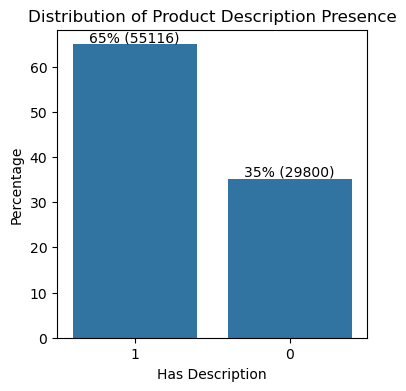

In [4]:
# Dichotomisation de la présence de description dans X_train
X_train['has_description'] = X_train['description'].notna().astype(int)

abs_values = X_train['has_description'].value_counts(ascending=False)
rel_values = X_train['has_description'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[1]:.0f}% ({p[0]})' for p in zip(abs_values, rel_values)]

# Affichage de la distribution de has_description
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=X_train, x='has_description', order=X_train['has_description'].value_counts().index, stat='percent')
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Distribution of Product Description Presence')
plt.xlabel('Has Description')
plt.ylabel('Percentage')
plt.show()

Il y a plus de produits avec une description (65 %) que de produits sans description (35%) malgré le caractère optionnel de la description. On peut supposer que cela est dû à l'importance de la description de l'article pour favoriser sa vente en plus de sa catégorisation. En effet, la description fournit d'autres éléments discriminant pour un produit dans le cadre de la recherche via un moteur parmi de nombreux produits.

## Description de y_train

In [5]:
data_info(y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB




prdtypecode
0           10
1         2280
2           50
3         1280
4         2705

In [6]:
# Nombre de valeurs uniques dans y_train
print("Unique values in y_train")
display(y_train.value_counts())

print("\n")
print("Count of unique values :", y_train.nunique())

Unique values in y_train


prdtypecode
2583           10209
1560            5073
1300            5045
2060            4993
2522            4989
1280            4870
2403            4774
2280            4760
1920            4303
1160            3953
1320            3241
10              3116
2705            2761
1140            2671
2582            2589
40              2508
2585            2496
1302            2491
1281            2070
50              1681
2462            1421
2905             872
60               832
2220             824
1301             807
1940             803
1180             764
Name: count, dtype: int64



Count of unique values : prdtypecode    27
dtype: int64


Il existe 27 classes de produits distinctes dans le jeu de données d'apprentissage.
Malgré une recherche de la taxonomie exacte des produits rakuten, nous n'avons pas réussi à avoir accès aux labels exacts des classes de produits. Pour faciliter la compréhension des données, nous avons décidé de les nommer nous même suite à l'exploration des données pour chaque catégorie. Nous ajoutons donc cette variable à y_train.

In [7]:
labels = pd.read_csv("./../data/prdtypecode_labels.csv", index_col=0)
display(labels)

y_train = y_train.merge(labels, on="prdtypecode", how="left")
display(y_train)

prdtypecode_label
prdtypecode                                                   
10                                                      livres
40                                                  jeux video
50                                       accesoires jeux video
60                                      consoles de jeux video
1140                           produits derivés de jeux vidéos
1160                                    cartes collectionables
1180            figurines collectionnables pour jeu de société
1280                                 jouets, peluches, poupées
1281                                           jeux de société
1300                          voitures miniatures et maquettes
1301              accesoires et jeux pour petits enfants/bébés
1302                                          jeux d'exterieur
1320                                accessoires petite enfance
1560                      mobilier de rangement pour la maison
1920                                           linge de maison
1940                                                nourriture
2060                      accesoires de décoration pour maison
2220                     accessoires pour animaux de compagnie
2280                                                 magazines
2403                                             livres et bds
2462          consoles de jeux vidéo et jeux vidéos d'occasion
2522                 produits de papeterie et rangement bureau
2582                       mobilier d'extérieur et accessoires
2583                                    accessoires de piscine
2585         outillage et accessoires pour travaux ou jardi...
2705                                                    livres
2905                                    jeux en téléchargement

prdtypecode                          prdtypecode_label
0               10                                     livres
1             2280                                  magazines
2               50                      accesoires jeux video
3             1280                  jouets, peluches, poupées
4             2705                                     livres
...            ...                                        ...
84911           40                                 jeux video
84912         2583                     accessoires de piscine
84913         2280                                  magazines
84914         1560       mobilier de rangement pour la maison
84915         2522  produits de papeterie et rangement bureau

[84916 rows x 2 columns]

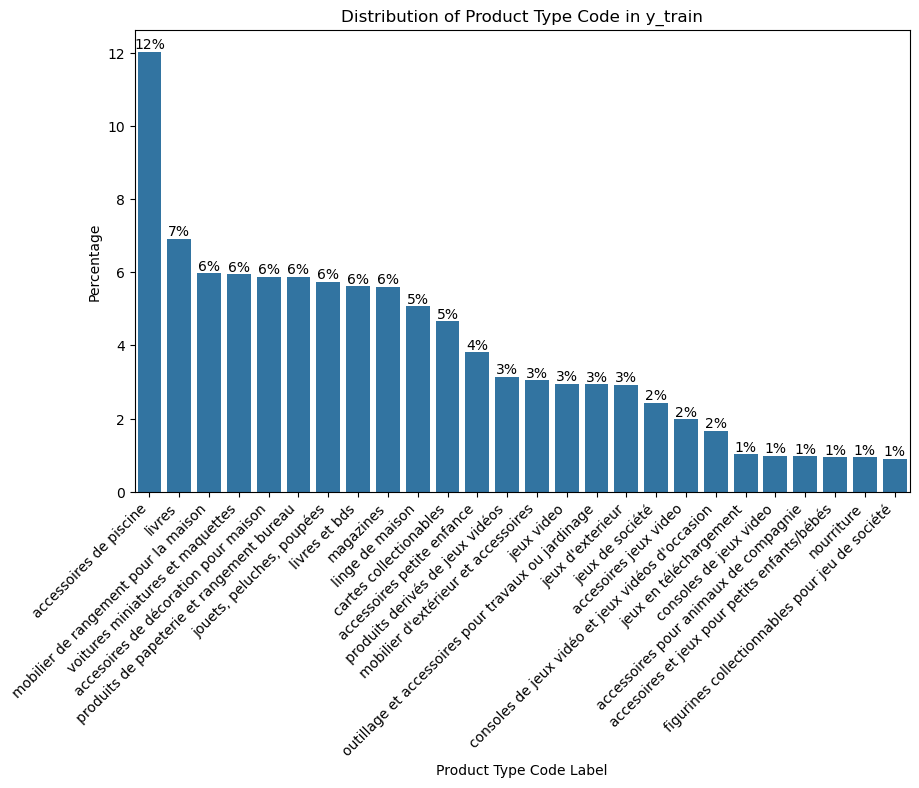

In [8]:
abs_values = y_train['prdtypecode_label'].value_counts(ascending=False)
rel_values = y_train['prdtypecode_label'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[1]:.0f}%' for p in zip(abs_values, rel_values)]

# Histogramme de la distribution des codes de type de produit dans y_train
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=y_train, x='prdtypecode_label', order=y_train['prdtypecode_label'].value_counts().index, stat='percent')
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Distribution of Product Type Code in y_train')
plt.xlabel('Product Type Code Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

Le jeu de données n'est pas équilibré :
- la classe 2583 (accessoires de piscine) est plus représentée que les autres avec 12% du jeu de données
- les classes 1560 (mobilier de rangement pour la maison), 1300 (voitures miniatures et maquettes), 2060 (accesoires de décoration pour maison), 2522 (produits de papeterie et rangement bureau), 1280 (jouets, peluches, poupées), 2403 (livres et bds), 2280 (magazines) suivent ensuite avec 6% chacune seulement
- les classes les moins représentées 2905 (jeux en téléchargement), 60 (consoles de jeux video), 2220 (accessoires pour animaux de compagnie), 1301 (accesoires et jeux pour petits enfants/bébés), 1940 (nourriture), 1180 (figurines collectionnables pour jeu de société) représentent quant à elles 1% chacune

## Analyse des variables disponibles

### Analyse croisée entre la présence de 'description' du produit et la catégorie du produit


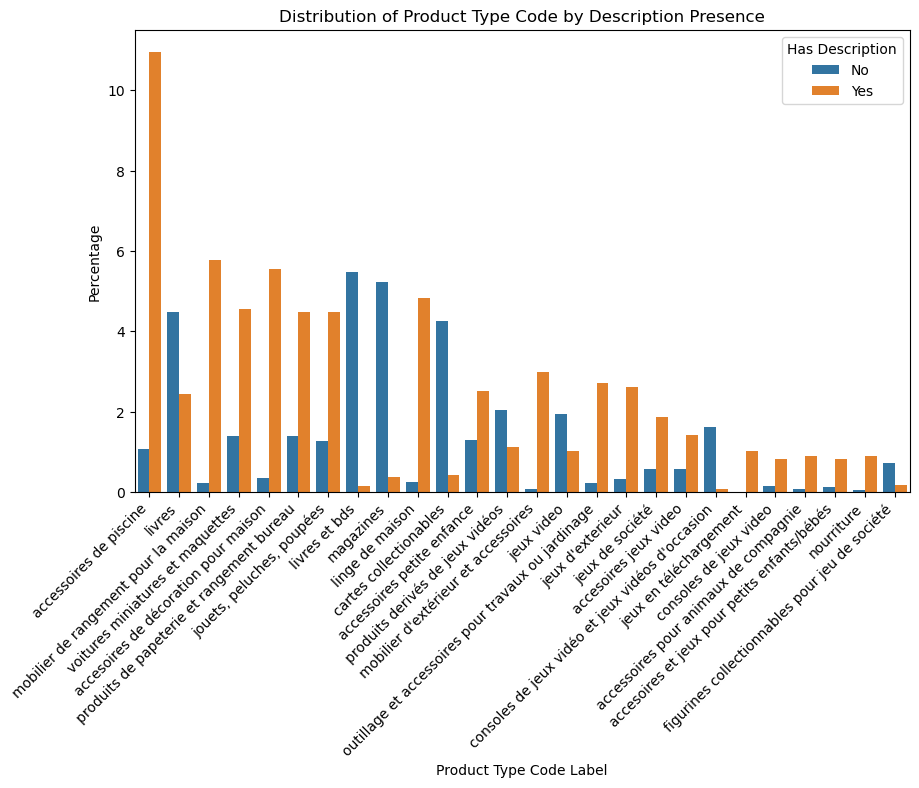

In [9]:
# Affichage de la distribution des codes de type de produit en fonction de la présence de description
plt.figure(figsize=(10, 6))
sns.countplot(data=y_train, x='prdtypecode_label', hue=X_train['has_description'], order=y_train['prdtypecode_label'].value_counts().index, stat='percent')
plt.title('Distribution of Product Type Code by Description Presence')
plt.xlabel('Product Type Code Label')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Description', loc='upper right', labels=['No', 'Yes'])
plt.show()

La répartition de produits avec ou sans description n'est pas homogène entre les catégories de produit par rapport au ratio moyen du jeu de données (65% avec et 35% sans description).
Certains produits comme 2403 contiennent majoritairement des produits non décrits alors que d'autres comme 1560 contiennent majoritairement des produits décrits.

### Analyse de la longueur de la variable 'designation'


Text(0.5, 0, 'Designation Length')

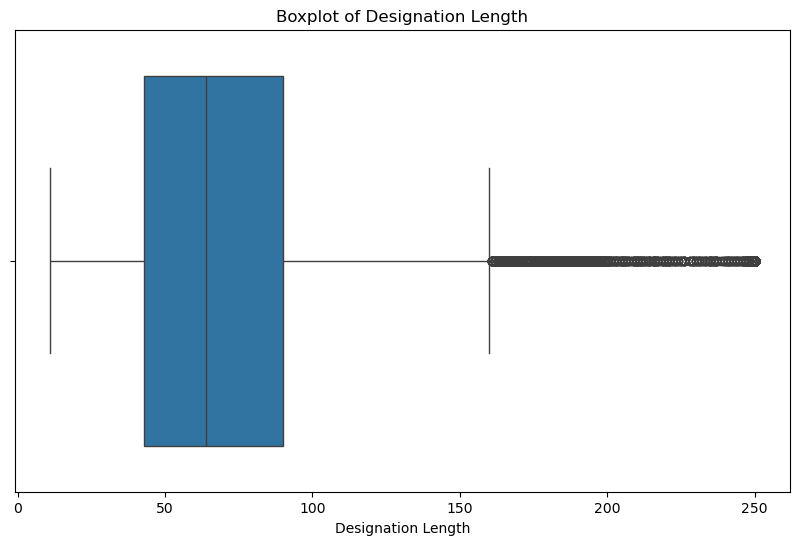

In [10]:
X_train['designation_length'] = X_train['designation'].str.len()

# Boxplot de la longueur de la variable 'designation'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='designation_length')

plt.title('Boxplot of Designation Length')
plt.xlabel('Designation Length')

In [11]:
X_train['designation_length'].describe()

count    84916.000000
mean        70.163303
std         36.793383
min         11.000000
25%         43.000000
50%         64.000000
75%         90.000000
max        250.000000
Name: designation_length, dtype: float64

On observe que la longueur de designation est très variable avec un min de 11 caractères et un max de 250 caractères.
Sa longueur moyenne est de 70 caractères et la médiane se situe à 64 caractères.
D'après le boxplot, il existe beaucoup d'outliers au dela de 160 caractères.

### Analyse croisée de la catégorie et de la longueur de la 'designation'

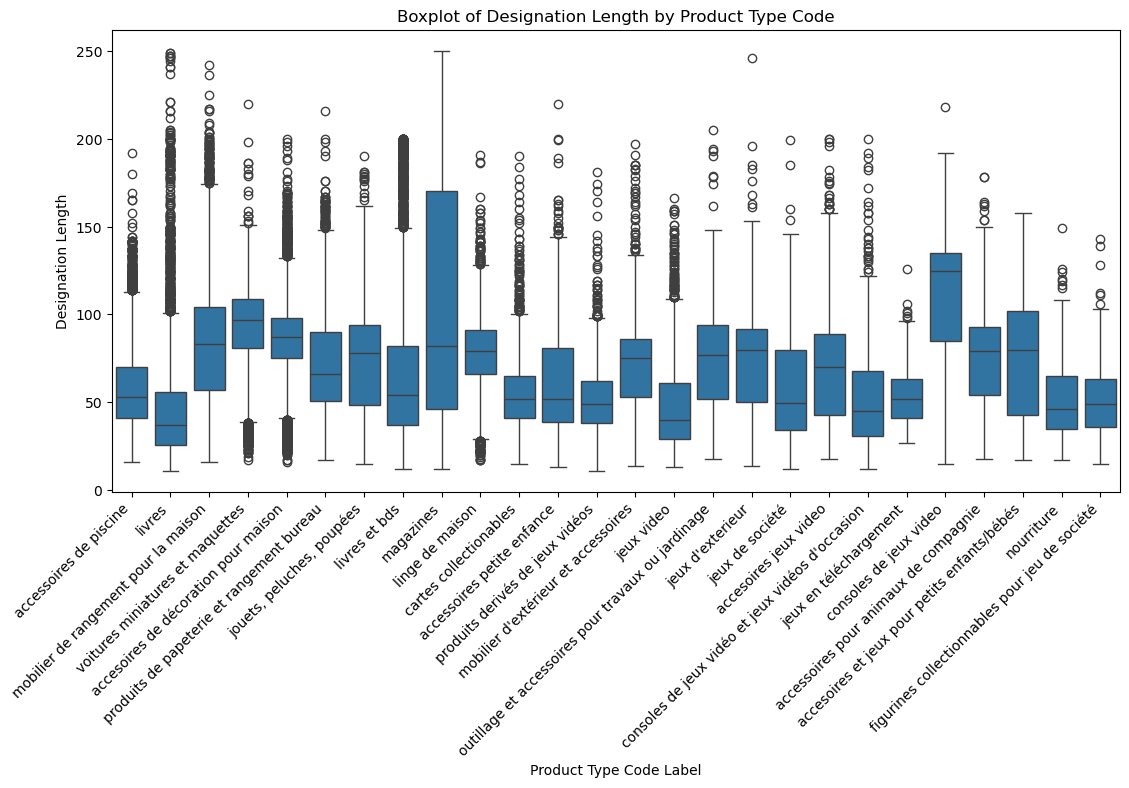

In [12]:
# Boxplot de la longueur de la variable 'designation' par catégorie de produit
plt.figure(figsize=(13, 6))
sns.boxplot(x=y_train['prdtypecode_label'], y=X_train['designation_length'], order=y_train['prdtypecode_label'].value_counts().index)
plt.title('Boxplot of Designation Length by Product Type Code')
plt.xlabel('Product Type Code Label')
plt.ylabel('Designation Length')
plt.xticks(rotation=45, ha='right')
plt.show()

La distribution de la longueur de Designation par catégorie de produit n'est pas homogène.

### Analyse des duplicats de 'designation'

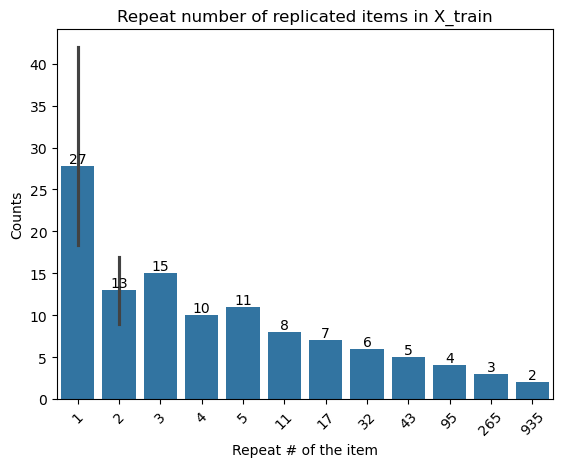

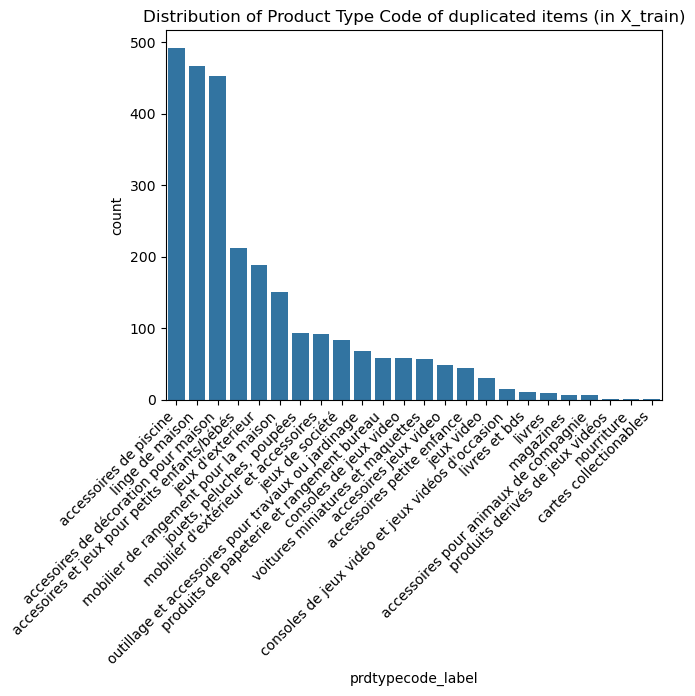

In [13]:
#### Duplicated values frequencies

counts = X_train["designation"].value_counts().reset_index()
counts.columns = ["designation", "repeat"]

repeats = counts['repeat'].value_counts().sort_index().reset_index()
repeats.columns = ['repeat', 'count']

repeats = repeats.iloc[1:]

ax = sns.barplot(data = repeats, x = 'count', y = 'repeat')
ax.bar_label(container = ax.containers[0],  fmt='%d')
plt.xticks(rotation = 45)
plt.xlabel("Repeat # of the item")
plt.ylabel("Counts")
plt.title("Repeat number of replicated items in X_train")
plt.show()


#### Duplicated values' categories

y_duplicated = y_train[X_train.duplicated(subset = ["designation"]) == True]

sns.countplot(data = y_duplicated, x = 'prdtypecode_label', order = y_duplicated['prdtypecode_label'].value_counts().index)
plt.xticks(rotation = 45, ha='right')
plt.title("Distribution of Product Type Code of duplicated items (in X_train)")
plt.show()

On observe de récurrents lignes de 'Designation' avec des fréquences qui varient de 2 à 76 instances: 935 articles se répètent 2 fois, 1 article 76 fois
On observe ces répétitions de Designation dans des catégories différentes

### Analyse de la longueur de la variable 'description'


Text(0.5, 0, 'Description Length')

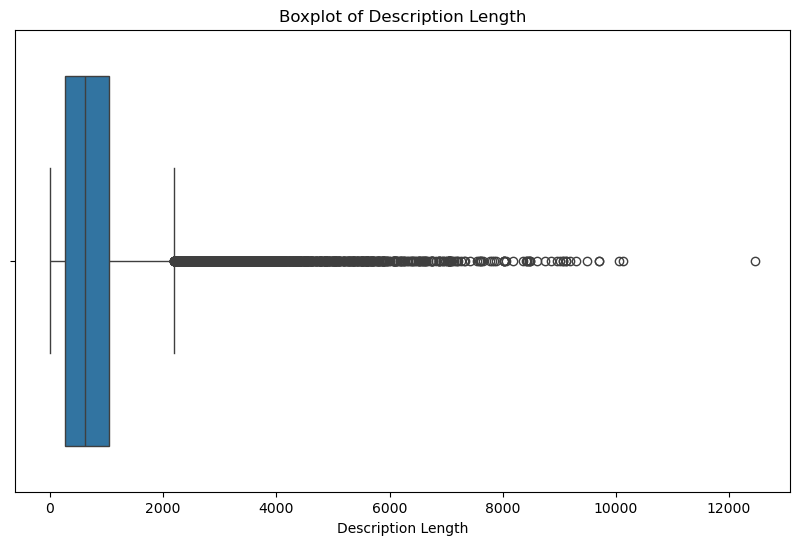

In [14]:
X_train['description_length'] = X_train['description'].str.len()

# Boxplot de la longueur de la variable 'descpription'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='description_length')

plt.title('Boxplot of Description Length')
plt.xlabel('Description Length')

In [15]:
X_train['description_length'].describe()

count    55116.000000
mean       808.171692
std        805.462153
min          1.000000
25%        259.000000
50%        626.000000
75%       1034.000000
max      12451.000000
Name: description_length, dtype: float64

On observe que la longueur de description est très variable avec un min de 1 caractères et un max de 12451 caractères.
Sa longueur moyenne est de 808 caractères et la médiane se situe à 626 caractères.
D'après le boxplot, il existe beaucoup d'outliers au dela de 2000 caractères.

### Analyse de la 'description' par catégorie de produit

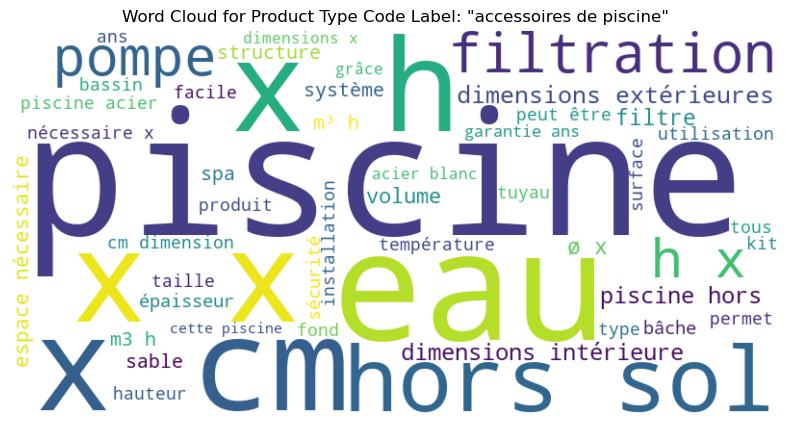

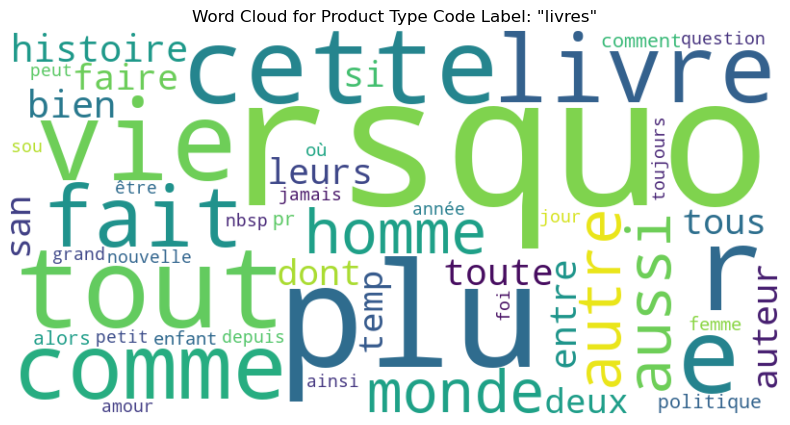

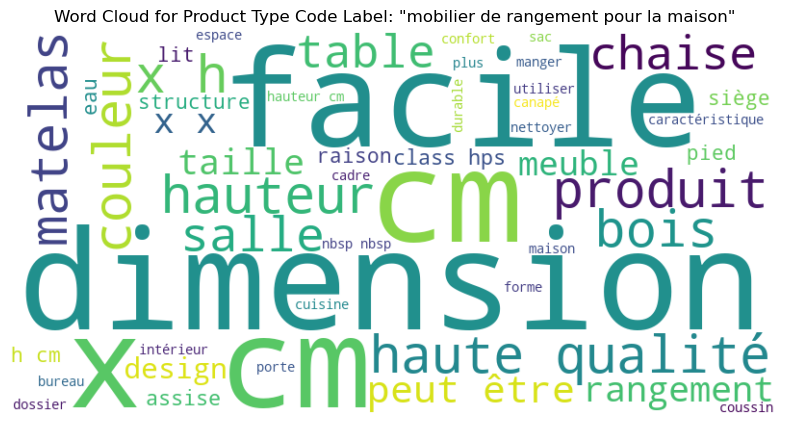

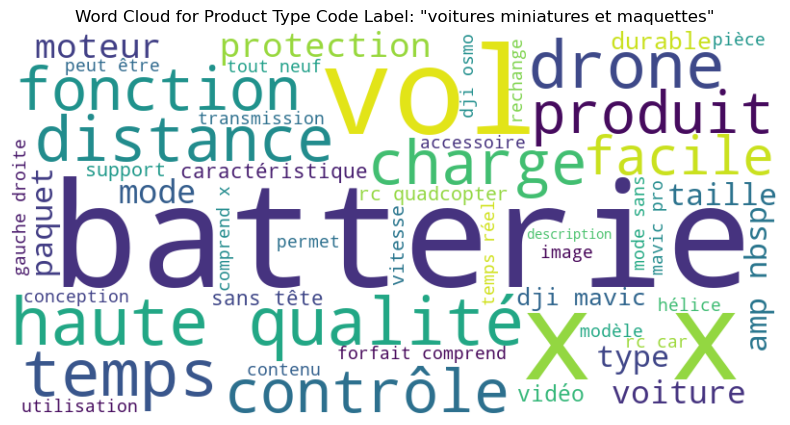

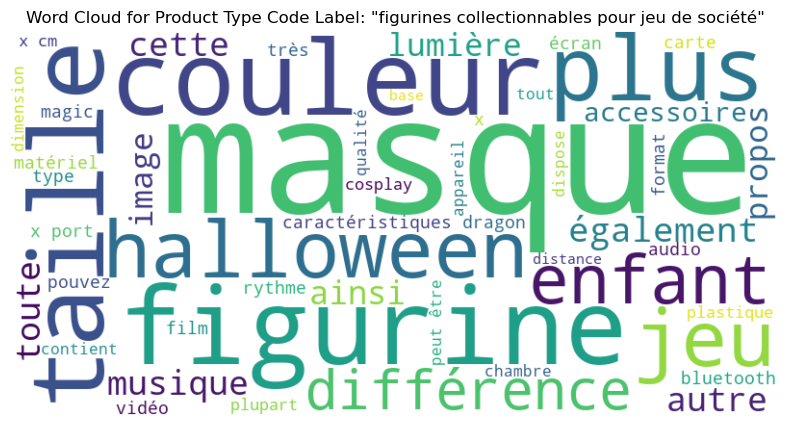

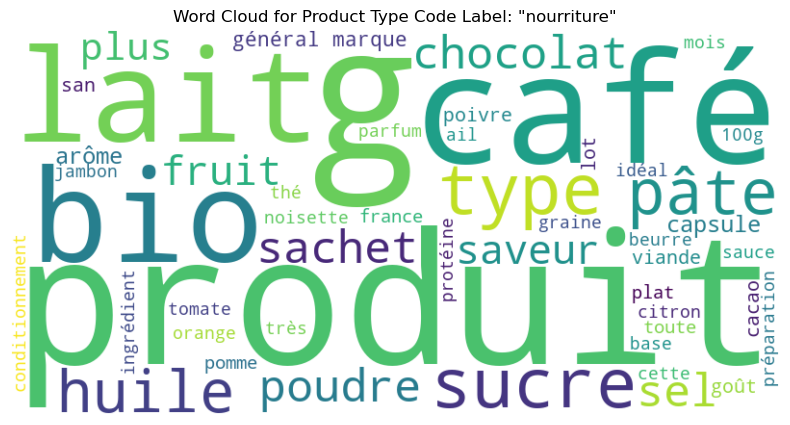

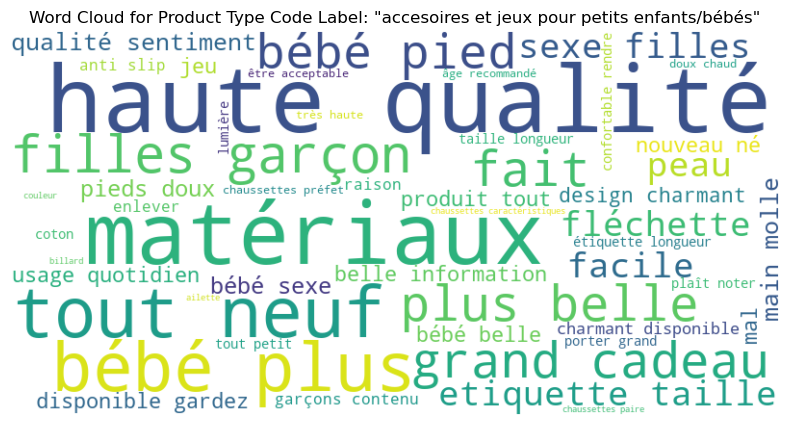

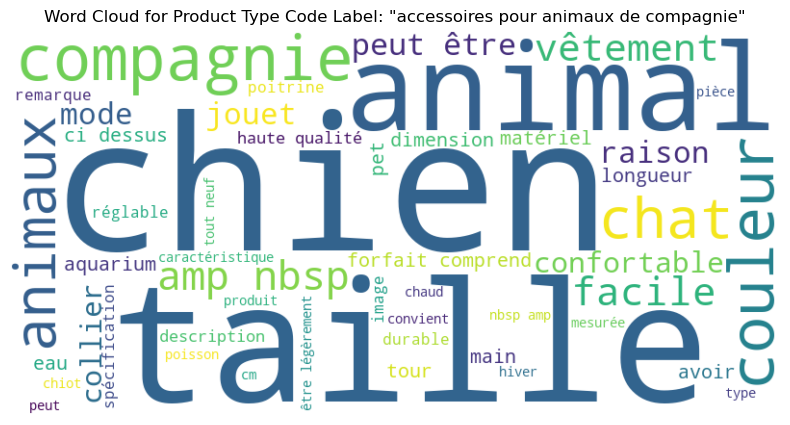

In [16]:
html_stopwords = ['br', 'p', 'div', 'span', 'b', 'i', 'li', 'ul', 'strong', 'em', 'eacute', 'agrave']
final_stopwords = stopwords.words('english') + stopwords.words('french') + html_stopwords

# Récupération des 4 catégories de produits avec le plus et le moins de descriptions pour comparaison
most_descriptions = y_train['prdtypecode_label'].value_counts().nlargest(4).index.tolist()
least_descriptions = y_train['prdtypecode_label'].value_counts().nsmallest(4).index.tolist()

# Concaténation de toutes les descriptions de chaque product label pour la création du nuage de mots
for label in most_descriptions + least_descriptions:
    text = ' '.join(X_train.loc[y_train['prdtypecode_label'] == label, 'description'].dropna().tolist())

    # Nettoyage du texte (apostrophes, ponctuation, etc.)
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    
    # Création du nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, stopwords = final_stopwords).generate(text)
    
    # Affichage du nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Product Type Code Label: "{label}"')
    plt.show()

Les 4 worclouds des catégories de produits avec le plus de descriptions et les 4 wordclouds de celles avec le moins de descriptions mettent clairement en avant certains termes plus que d'autres.

Cela nous permet d'identifier la catégorie de produit d'une manière sémantique à la lecture des termes mis en exergue : on pourra étudier cette intuition en faisant du deep learning ou encore du NLP pour classifier les catégories.

Sachant que nous avons principalement des données non structurées pour la classification (du texte parfois optionnel et des images), cette approche semble la plus efficace.

## Analyse des images

### Affichage des images

Quelques exemples d'images avec les fonctions utiles vues précédemment.

Image dimensions: 500x500 pixels


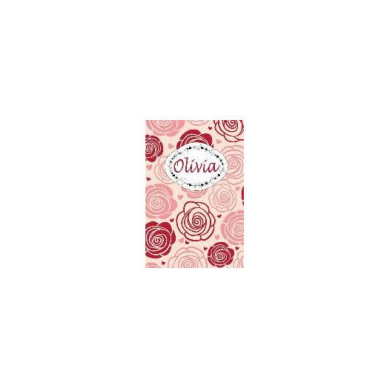

In [17]:
display_image_df(1263597046, 3804725264, "train", print_dim=True)

Image dimensions: 500x500 pixels


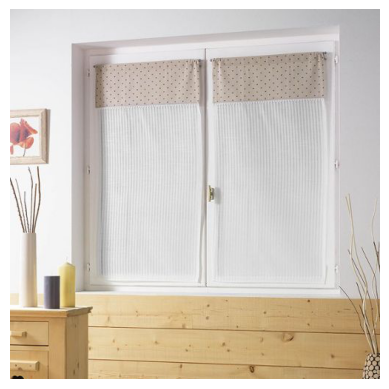

In [18]:
display_image_df(X_train.loc[13, "imageid"], X_train.loc[13, "productid"], "train", print_dim=True)

Image dimensions: 500x500 pixels


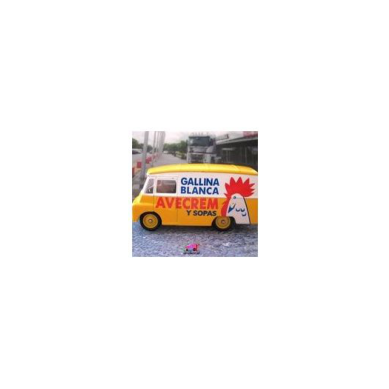

In [19]:
display_image_from_row(15, "test", is_index=False, print_dim=True)

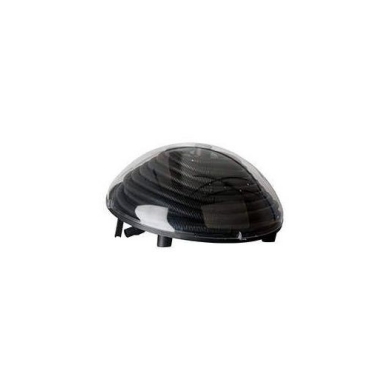

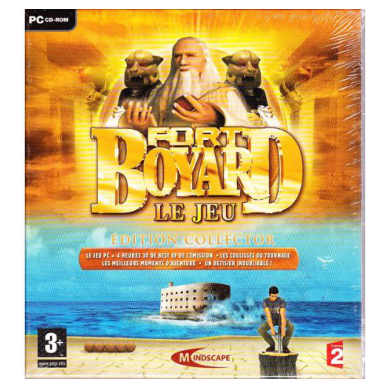

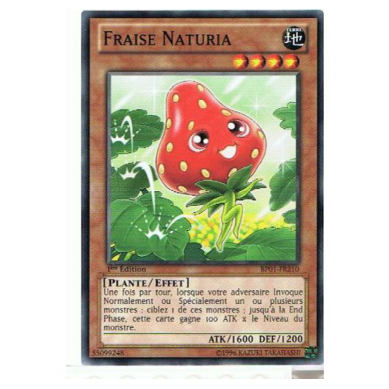

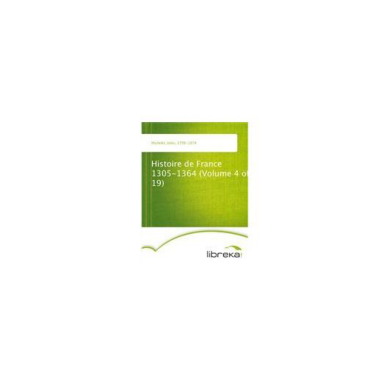

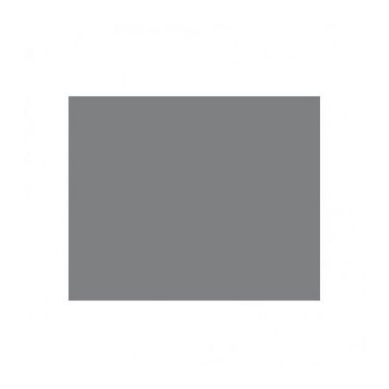

In [20]:
### Random images read with Matplotlib ###
for i in np.random.choice(np.arange(0, len(X_train)), size=5):
    display_image_from_row(i, "train", is_index=False)

On remarque que toutes les images semblent être de la même dimension 500x500 pixels et en couleur. Cependant leurs dimensions utiles sont différentes: la différence est comblée par des bords blancs.

Dans un premier temps, nous vérifierons l'unicité du format des images, puis nous nous intéresserons aux dimensions utiles.

### Affichage de l'image et de la description d'un produit par classe

Product type code: 10
Product type label: "livres"
Designation: Les Amours De Napoléon / Savant Jean / Réf27403
Description: nan
Image dimensions: 500x500 pixels


/var/folders/8x/ld_gmkd17z1c3jrwtkt15z3m0000gn/T/ipykernel_39442/1180863062.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_indices = y_train.groupby('prdtypecode').apply(lambda x: x.sample(1)).index.get_level_values(1).tolist()


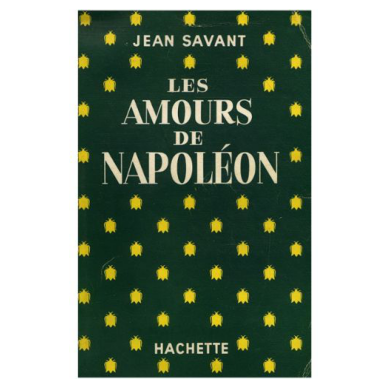

Product type code: 40
Product type label: "jeux video"
Designation: Kurukuru Chameleon Ds[Import Japonais]
Description: nan
Image dimensions: 500x500 pixels


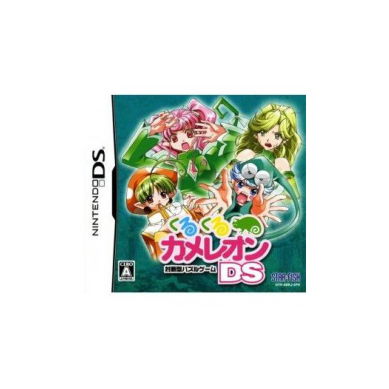

Product type code: 50
Product type label: "accesoires jeux video"
Designation: Bracelet En Silicone Pour Bracelet De Montre En Silicone Pour La S¿¿Rie Apple Watch 3/2/1 42mm
Description: Nouvelle bande de bracelet IWatch en silicone pour bracelet de sport pour les s¿¿ries Apple Watch 3/2/1 42mm Caract¿¿ristiques: 100% neuf et haute qualit¿¿. Le design unique d&#39;Ultraman vous rend attrayant et s¿¿duisant. Mat¿¿riau: Bande de silicone Longueur: 235mm Style classique et sportif ¿¿l¿¿gant et exquis. Compatible pour Apple Watch 42mm r¿¿sistant aux rayures r¿¿sistant ¿¿ l&#39;usure. Imperm¿¿able respirant bon choix pour les sports. Watch Band est livr¿¿ avec un connecteur aux deux extr¿¿mit¿¿s qui se verrouille avec pr¿¿cision et en toute s¿¿curit¿¿ sur l&#39;interface Apple Watch Band. Acc¿¿s complet ¿¿ tous les ports et ¿¿ toutes les prises. M¿ºme apparence que les sangles Apple. Ajustement et confort exceptionnels pour les programmes de bien-¿ºtre et une utilisation ordinaire. Tout neu

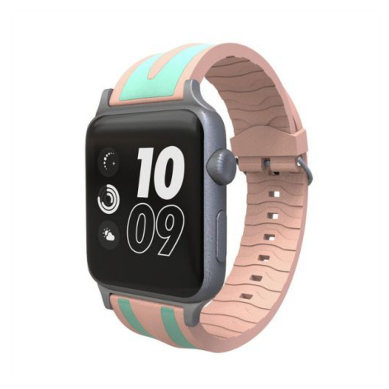

Product type code: 60
Product type label: "consoles de jeux video"
Designation: Nintendo Gamecube Grise Version Japonaise
Description: - Pack de base d'une console gamecube.<br>- Couleur grise.<br>- Version Japonaise.
Image dimensions: 500x500 pixels


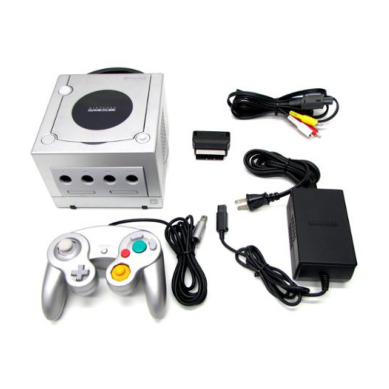

Product type code: 1140
Product type label: "produits derivés de jeux vidéos"
Designation: Batman Arkham Knight - Dc Comics Statuette Pvc Artfx+ 1/10the Arkham Knight 25 Cm 
Description: nan
Image dimensions: 500x500 pixels


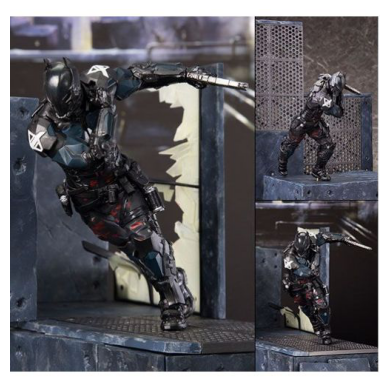

Product type code: 1160
Product type label: "cartes collectionables"
Designation: Danny Rose  -Match Attax 2013-14 - N° 308
Description: nan
Image dimensions: 500x500 pixels


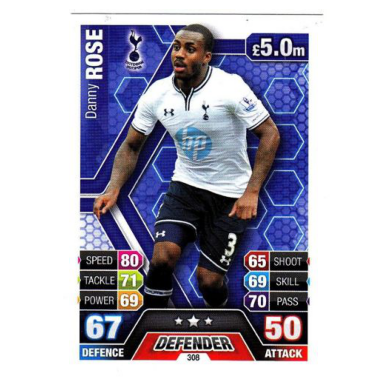

Product type code: 1180
Product type label: "figurines collectionnables pour jeu de société"
Designation: Heroclix. Iceman # 004 (X-Men Xavier&#39;S School)
Description: nan
Image dimensions: 500x500 pixels


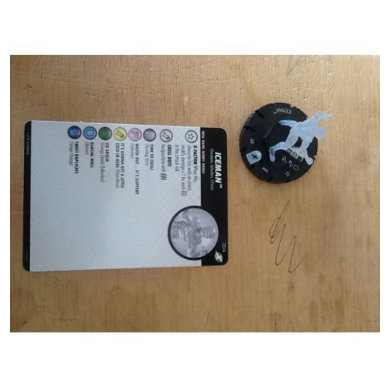

Product type code: 1280
Product type label: "jouets, peluches, poupées"
Designation: Haute Vitesse Voiture De Course Escalade De Télécommande Universelle Voiture Électrique Off Truck Route
Description: Haute vitesse voiture de course d&#39;escalade télécommande RC voiture électrique hors route camion Caractéristiques: Quatre roues sont installées ressort de suspension indépendante laisser plus souple et aussi jouer le corps de voiture cross-country de la fonction anti-choc pour le corps pour protéger les composants électroniques à l&#39;intérieur de la voiture corps. Forte puissance moteur fournit un couple élevé pour assurer la voiture complète des mouvements difficiles. Aucune terre de la matière plage de sable la boue les zones humides prairies route de montagne en pierre sauvage les rochers peuvent être percée facilement. Adopté des pneus en caoutchouc avec Gully profond pour la capacité de forte adhérence frottement élevé et anti-dérapage. Vous pouvez faire un virage brusque ou ar

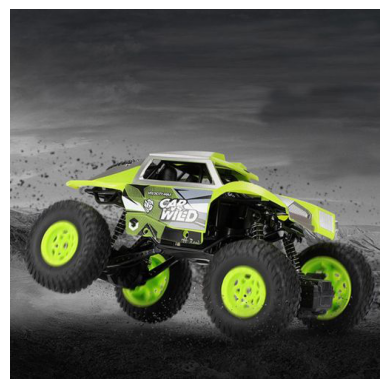

Product type code: 1281
Product type label: "jeux de société"
Designation: Tarot Les Voix Des Anges.
Description: nan
Image dimensions: 500x500 pixels


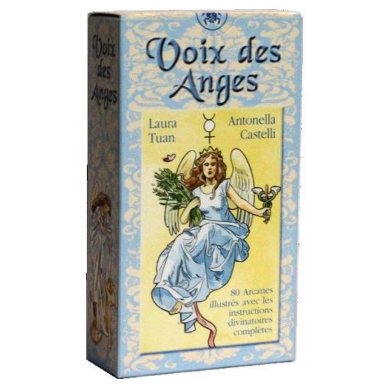

Product type code: 1300
Product type label: "voitures miniatures et maquettes"
Designation: Boeing 787 -9 Dreamliner Qantas 1/500 Herpa-Herpa
Description: Boeing 787 -9 Dreamliner Qantas 1/500 Herpa
Image dimensions: 500x500 pixels


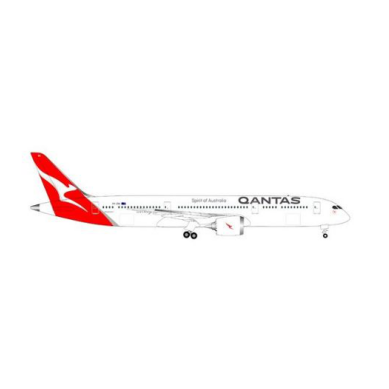

Product type code: 1301
Product type label: "accesoires et jeux pour petits enfants/bébés"
Designation: Coffret queue de billard français carambole Lynx 40 06340-E. Canne de billard et Mallette noire Riley-Lynx
Description: nan
Image dimensions: 500x500 pixels


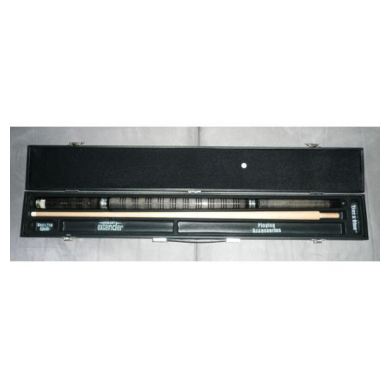

Product type code: 1302
Product type label: "jeux d'exterieur"
Designation: Quad À Pédales Pirate : Noir
Description: nan
Image dimensions: 500x500 pixels


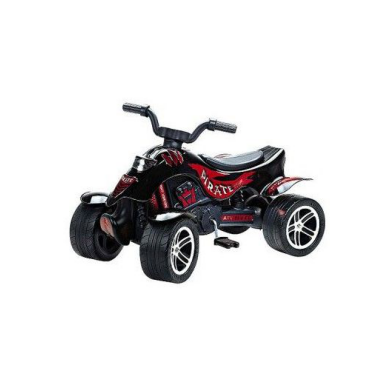

Product type code: 1320
Product type label: "accessoires petite enfance"
Designation: Bébé Aspirateur Nasal Électrique Sûr Hygiénique Nez Nettoyant Doux Ergonomique Anti-Reflux Garçon Filles Oral Snot Sucker Rose
Description: undefined <p>     Bébé Aspirateur Nasal Électrique Sûr Hygiénique Nez Nettoyant Doux Ergonomique Anti-reflux Garçon Filles Oral Snot Sucker Rose </p> <p>      </p> <p>      </p><br /> <p>     <br /> </p>
Image dimensions: 500x500 pixels


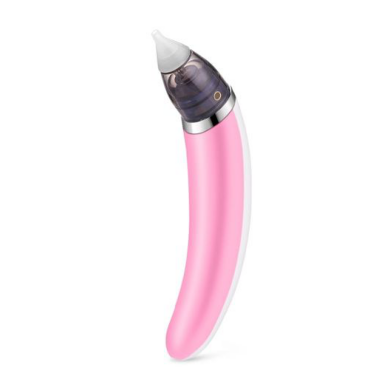

Product type code: 1560
Product type label: "mobilier de rangement pour la maison"
Designation: Dies Silicone Stamp Pochoirs Bricolage Scrapbooking Album Photo Décor Embosser Fournitures De Cuisine 5032
Description: Dies silicone Stamp Pochoirs DIY scrapbooking Album photo Décor embosser Description Matériel: Taille de silicone: I: 14 * 14cm tout neuf et de haute qualité. Fait de matériaux de silicone en bonne santé et ne stimulent pas votre peau. Doux et texturé facile à diy. Combiné par différents modèles assez pour répondre à vos besoins. Peut être utilisé pour la parure des albums photos. Il est également un bon choix pour les cadeaux apporter surprise pour vos amis. Profitez de votre temps de magasinage. Comment utiliser: Étape 1: Enlevez le tampon de la feuille d&#39;acétate de protection Étape 2: encre le timbre. Étape 3: timbre fermement sur votre papier. Étape 4: Peut être nettoyé avec de l&#39;eau. Le paquet contient: 1pcs Effacer Avis de Stamp: S&#39;il vous plaît permettre 

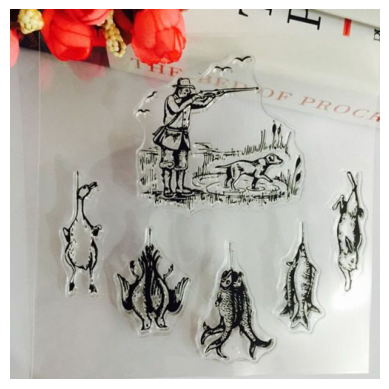

Product type code: 1920
Product type label: "linge de maison"
Designation: Noël Canapé-Lit Décoration Pillow Festival Coussin De Couverture De Cas (20x12inch)
Description: Noël Canapé-lit Décoration Pillow Festival Coussin Case Cover (20x12inch) Spécifications: 100% tout neuf et de haute qualité Parfait pour place sur le canapé un café une bibliothèque un magasin de livres partie club. Matériau: Forme Lin: Place Taille: 50cmx30cm / 20x12inch Type: Taie d&#39;oreiller S&#39;il vous plaît permettre une légère déviation de la couleur et de la mesure! S&#39;il vous plaît comprendre merci! Le forfait comprend: 1pc Taie d&#39;oreiller
Image dimensions: 500x500 pixels


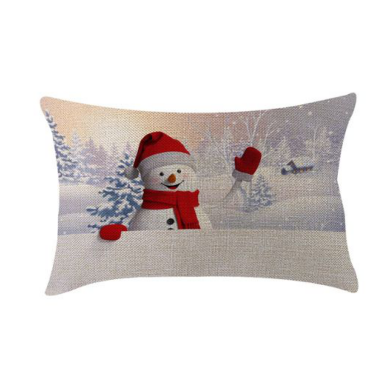

Product type code: 1940
Product type label: "nourriture"
Designation: Lot De 2 Sachet Bonbon Gélifié Fraise Lisse Halal Fini 100g - Sans Gluten - 019
Description: Lot de 2 Sachet Bonbon Gélifié Fraise Lisse Halal Fini 100g. Fabriqué à base de gélatine de boeuf certifié Halal. Sans Gluten 0% de matière grasse. Ce sachet contient 100 grammes de bonbons gélifié Halal en forme de fraise. Ingrédients : Sucre sirop de glucose eau gélatine humectant (E420) acidifiants (E330 E270) correcteur d&#39;acidité (E325) arômes agents d&#39;enrobage (E901 E903) colorants et/ou concentrés : E100 E133 E160c Carotte cassis noir). Contenance : 100 grammes. Dimensions : Environ 175 x 12 cm.  Matière : Plastique.  Couleur : Multicolore. Ne pas laisser à la portée des enfants de moins de 3 ans. D&#39;autres modèles sont disponibles dans notre boutique.  Neuf.
Image dimensions: 500x500 pixels


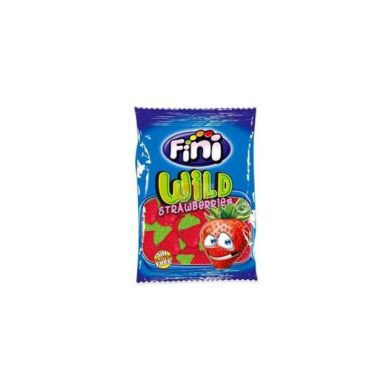

Product type code: 2060
Product type label: "accesoires de décoration pour maison"
Designation: Enfants Imperméable Tablier Bavoir Cuisiner Cuisine Cartoon Peinture Eat Drink-Vêtement Lujuik
Description: Enfants imperméable Cartoon Cuisine Tablier de cuisine bavoir peinture Eat Drink Feature vêtement extérieur: 100% qualité de marque nouvelle et haute! Le meilleur choix pour la cuisine de la cuisine Donnez votre fils un grand cadeau Matériel: polyester imperméable Léger étui souple lisse lisse. Durable réutilisable imperméable résistant à l&#39;huile sans manches. Idéal pour restaurant cuisine cantine usine nettoyage quotidien etc. longueur Tablier: comme l&#39;image Couleur: comme l&#39;image affichée (Selon votre sélection d&#39;achat) Taille: 40x50cm Avis: S&#39;il vous plaît permettre erreur 1-2cm en raison de la mesure manuelle . Pls assurez-vous que vous ne me dérange pas avant que vous offriez. Les couleurs peuvent avoir différentes que l&#39;affichage de différence pls comprend

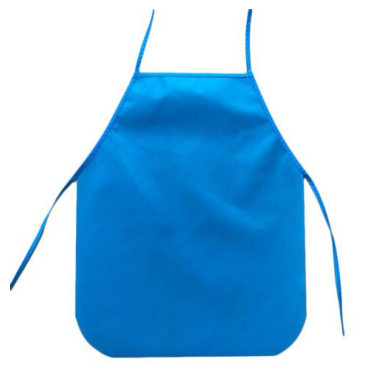

Product type code: 2220
Product type label: "accessoires pour animaux de compagnie"
Designation: Noba - Bac À Litière Anti-Odeur Pour Chats - Bleu
Description: Ce bac à litière Noba utilise la <strong>technologie ConvactiveMC</strong> pour créer un environnement aride où les microparticules responsables des mauvaises odeurs demeurent inactives. Cela fait en sorte que la litière peut être conservée jusqu&#39;à quatre fois plus longtemps. L&#39;entretien devient un jeu d&#39;enfant. Et moins de gaspillage signifie plus d&#39;économies ! La technologie Convactive du bac à litière Noba trouve l&#39;humidité là où elle se cache et l&#39;élimine désactivant du coup le processus biochimique qui crée l&#39;ammoniac.<br /><br /><strong>Caractéristiques du bac à litière Noba :</strong><ul><li>Matière : Plastique</li><li>Accessoire fourni : Aérateur Noba</li><li>Dimensions : 55x42x20 centimètres</li><li>Poids : 2 kilos</li><li>Coloris : Bleu</li><li>Fabriqué au Canada</li><li><br /><strong>Consei

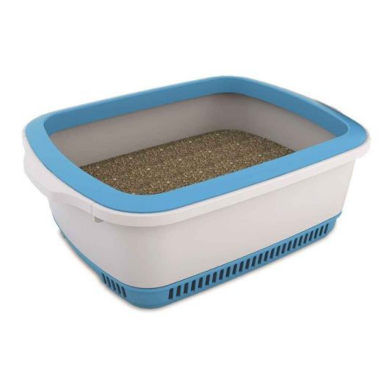

Product type code: 2280
Product type label: "magazines"
Designation: Le Journal De Mickey  N° 231 : Nouvelle Serie
Description: nan
Image dimensions: 500x500 pixels


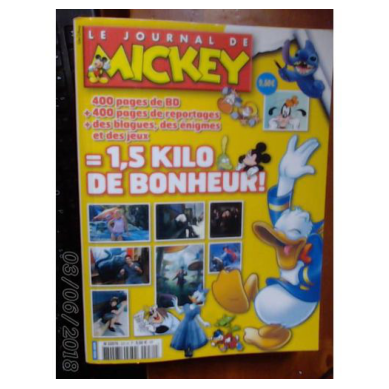

Product type code: 2403
Product type label: "livres et bds"
Designation: Facteurs En France /Chroniques Du Petit Matin. Tomes 1 Et 2
Description: nan
Image dimensions: 500x500 pixels


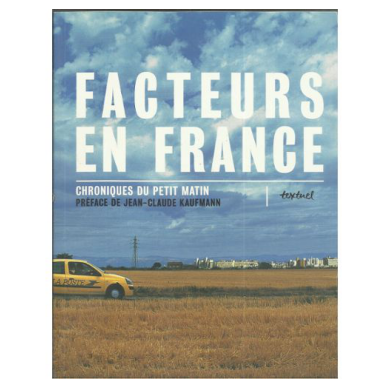

Product type code: 2462
Product type label: "consoles de jeux vidéo et jeux vidéos d'occasion"
Designation: Jeux Pc Lot Divers Jeux Et Démos
Description: nan
Image dimensions: 500x500 pixels


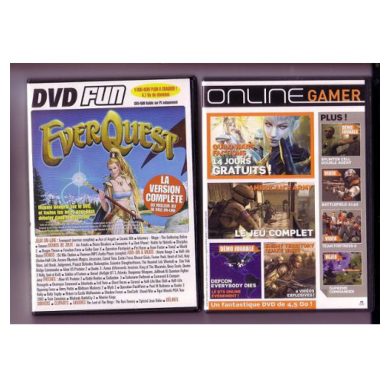

Product type code: 2522
Product type label: "produits de papeterie et rangement bureau"
Designation: 10pcs Set Jeu Dungeons & Dragons Polyédrique Multi Sided Dice Acrylique
Description: 10pcs Set DUNGEONS &amp; amp; Dragons polyédrique multi Sided acrylique Dice Spécification: 100% tout neuf Taille: environ 15 cm 7pcs dices dans un ensemble Montrez vos compétences de jeu avec ces côtés multi-dices Un cadeau parfait pour les amateurs de jeu TRPG Choix de couleurs comme image Matériel: résine Note: L&#39;article couleur affichée dans les photos peut montrer un peu différent sur votre écran d&#39;ordinateur car les moniteurs ne sont pas calibrées même. Le paquet contient: 10pc dés
Image dimensions: 500x500 pixels


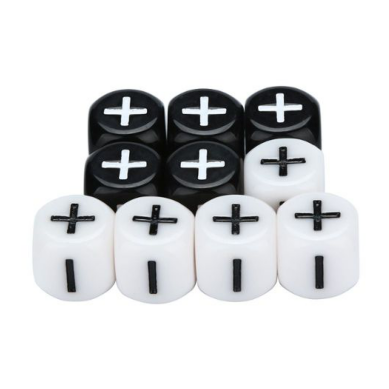

Product type code: 2582
Product type label: "mobilier d'extérieur et accessoires"
Designation: Oxen 151581 - Douche Hidro Brosse Wc Bidet
Description: Fabriqué en laiton - Chrome brillant - Facile à installer
Image dimensions: 500x500 pixels


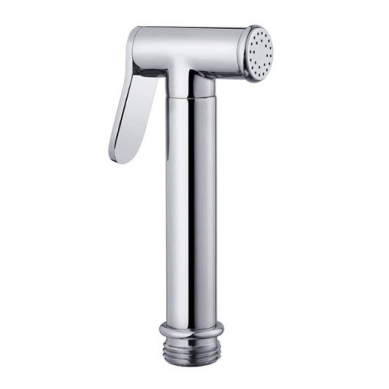

Product type code: 2583
Product type label: "accessoires de piscine"
Designation: Électrolyseur au sel Zodiac Ei 17
Description: nan
Image dimensions: 500x500 pixels


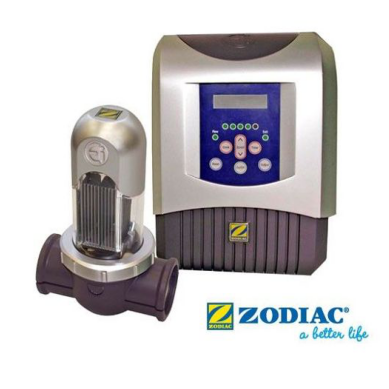

Product type code: 2585
Product type label: "outillage et accessoires pour travaux ou jardinage"
Designation: Film 250 microns vert blanc opaque - Longueur : 5 m Largeur : 10.50 m Vert H
Description: Film 250 microns vert à l&#39;extérieur et blanc à l&#39;intérieurCe film vert/blanc en 250 microns vous permettra de couvrir facilement et solidement un abri ou un tunnel. Il permet également de faire une finition de pignon propre et étanche entre la couverture et les pignons. Existe en largeur 6.50 m 8 m 10.50 m 12 m13.50 m et 16 m<strong>Pourquoi choisir la bâche 250µ vert/blanc opaque ?</strong>Film très résistant qui permet une bonne protection contre les intempéries (vent pluie neige...) <strong>Pour l&#39;élevage</strong> on les utilise de façon classique en couverture <strong>d&#39;abri pour animaux</strong>. On l&#39;utilise aussi pour les <strong>engins agricoles</strong> et <strong>fourrages</strong>.Elle est dotée d&#39;une garantie usine 6 ans anti-UV avec une durée de vie con

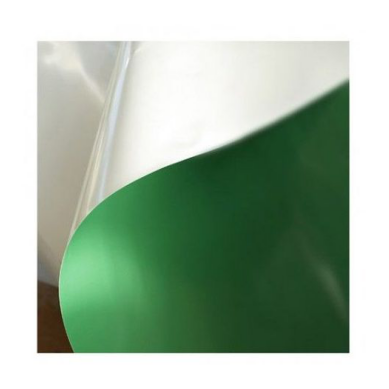

Product type code: 2705
Product type label: "livres"
Designation: Les Îles De Toronto
Description: nan
Image dimensions: 500x500 pixels


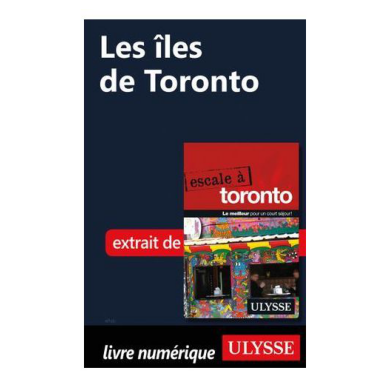

Product type code: 2905
Product type label: "jeux en téléchargement"
Designation: Stardrive 2 - Digital Deluxe Edition - Jeu En Téléchargement
Description: NOTE : code d&#39;activation à utiliser exclusivement sur un compte Steam valide connexion Internet requise. <br /><br /><br /> <strong>EDITION DELUXE</strong>   <br /> L&#39;édition numérique Deluxe vous permet de personnaliser l&#39;apparence de vos vaisseaux à l&#39;aide de différentes peintures ! Peignez vos croiseurs aux couleurs du drapeau américain et balancez de véritables mégadoses de démocratie depuis votre position en orbite ! Ou peut-être préféreriez-vous roder dans l&#39;espace dans un croiseur noir sur noir indétectable ? Chaque race dispose de plusieurs options de peintures que vous pouvez choisir. <br /><br /> De plus l&#39;édition numérique Deluxe inclut le journal de conception StarDrive une copie numérique du journal écrit à la main utilisé par le développeur pendant le développement du jeu. Apprenez-en plus sur l

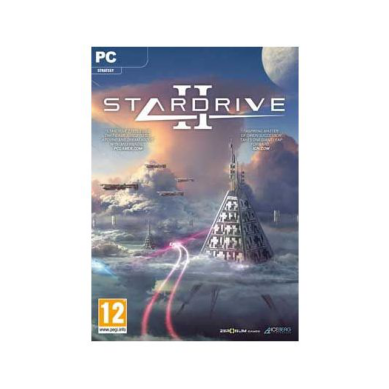

In [21]:
# Random selection of one index in y_train for each type of product code
random_indices = y_train.groupby('prdtypecode').apply(lambda x: x.sample(1)).index.get_level_values(1).tolist()

# Display the image for the randomly selected indices
for idx in random_indices:
    print(f"Product type code: {y_train.loc[idx, 'prdtypecode']}")
    print(f"Product type label: \"{y_train.loc[idx, 'prdtypecode_label']}\"")
    print(f"Designation: {X_train.loc[idx, 'designation']}")
    print(f"Description: {X_train.loc[idx, 'description']}")

    display_image_from_row(idx, "train", is_index=True, print_dim=True)

### Vérification du format

Associons à chaque produit le path de l'image qui lui correspond.

In [22]:
X_train["imagepath"] = X_train.apply(lambda row: image_path(row["imageid"], row["productid"], "train"), axis=1)
X_test["imagepath"] = X_test.apply(lambda row: image_path(row["imageid"], row["productid"], "test"), axis=1)

Le dataset train contient autant que d'images que de produits (84916). On pose alors l'hypothèse très probable que chaque produit a bien une image associée, même si elle est vide (entièrement blanche, ce qu'on testera plus tard), ce qui correspondrait à une valeur nulle.

Les chargements ou traitements d'image étant assez lourds, nous décidons de prendre seulement un échantillon de 1000 images aléatoires (mais reproductible) pour notre première analyse, et nous gardons les produits associées en textuel de côté.

In [23]:
X_train_sample = X_train.sample(n=1000, random_state=42)

X_img_sample = X_train_sample["imagepath"]
X_img_sample.head()

36138    /Users/cramarokoto/Documents/Datascientest/jul...
68630    /Users/cramarokoto/Documents/Datascientest/jul...
36172    /Users/cramarokoto/Documents/Datascientest/jul...
9830     /Users/cramarokoto/Documents/Datascientest/jul...
28422    /Users/cramarokoto/Documents/Datascientest/jul...
Name: imagepath, dtype: object

On l'enrichit avec d'autres informations.

In [24]:
def shape_from_path(image_path):
    img = mpimg.imread(image_path)
    return img.shape

In [25]:
X_img_sample = pd.concat([
    X_img_sample.rename("image_path"),
    X_img_sample.apply(shape_from_path).rename("image_shape")
], axis=1)

In [26]:
data_info(X_img_sample)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 36138 to 65534
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   1000 non-null   object
 1   image_shape  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB




image_path    image_shape
36138  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)
68630  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)
36172  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)
9830   /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)
28422  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)

Vérifions que dans le dataset (au moins dans l'échantillon), toutes les images sont au même format.

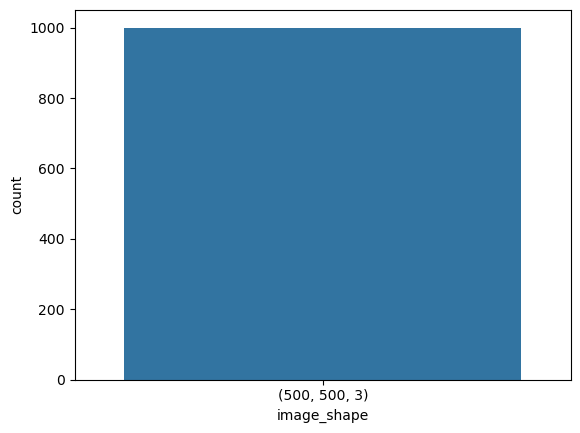

In [27]:
# Compter les occurrences des formats
X_img_sample['image_shape'] = X_img_sample['image_shape'].astype(str)
sns.countplot(data=X_img_sample, x='image_shape', order=X_img_sample['image_shape'].value_counts().index)
plt.show()

On a bien uniquement des images en 500x500 pixels et en RGB.

### Content Box: la zone utile sans les bords blancs

Déterminons maintenant la "zone utile", c'est-à-dire l'image sans les bords blancs.

In [28]:
def get_content_box(image_path, seuil_ratio=0.99):
    """
    Détecte la bounding box du contenu non blanc d'une image.

    Args:
        image_path (str): chemin vers l'image.
        seuil (float): seuil pour considérer un pixel blanc (entre 0 et 1).
    Returns:
        tuple: dimensions de la zone utile (largeur, hauteur), coordonnées x_min, y_min, x_max, y_max.
    """
     
    # Charge l'image (forme: H x W x C), valeurs normalisées [0, 1]
    img = mpimg.imread(image_path)

    # img peut être chargé normalisé (valeurs de couleurs entre 0 et 1) ou en [0, 255]
    # On adapte donc le seuil en fonction de la valeur maximale des pixels
    seuil = seuil_ratio * img.max()

    # Crée un masque des pixels "non blancs"
    # Ici, on considère qu'un pixel est blanc si ses 3 canaux sont > seuil (proche de 1)
    non_white = np.any(img < seuil, axis=2)
   
    # Trouve les coordonnées de la zone utile
    coords = np.argwhere(non_white)

    if coords.size == 0:
        # "Image entièrement blanche."
        return None

    # Récupère les limites du contenu utile
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)

    width = x_max - x_min + 1
    height = y_max - y_min + 1

    # print(f"Taille utile : {width} x {height} pixels")
    # print(f"Bounding box : x={x_min}, y={y_min}, largeur={width}, hauteur={height}")

    return ((width, height), x_min, y_min, x_max, y_max)

Image dimensions: 500x500 pixels


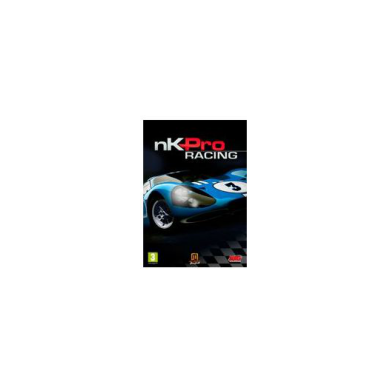

(np.int64(144), np.int64(208)) 176 144 319 351


In [29]:
# Exemple d’utilisation
display_image(X_img_sample.iloc[0]["image_path"], print_dim=True)
dim, x_min, y_min, x_max, y_max = get_content_box(image_path=X_img_sample.iloc[0]["image_path"])
print(dim, x_min, y_min, x_max, y_max)

In [30]:
# Charge l'image complète et retourne l'image utile à partir de la bounding box
def load_content_from_box(image_path, x_min, y_min, x_max, y_max):
    # Charge l'image complète
    img = mpimg.imread(image_path)

    # Attention : dans numpy, l'ordre est img[hauteur, largeur] donc img[y_min:y_max+1, x_min:x_max+1]
    img_cropped = img[y_min:y_max+1, x_min:x_max+1, :]
    return img_cropped


def load_content_box_from_image(image_path):
    """
    Charge l'image complète et retourne l'image utile.
    
    Args:
        image_path (str): chemin vers l'image.
    
    Returns:
        np.ndarray: image utile sans les bords blancs.
    """
    dim, x_min, y_min, x_max, y_max = get_content_box(image_path)
    if dim is None:
        return None  # Image entièrement blanche
    
    return load_content_from_box(image_path, x_min, y_min, x_max, y_max)

Image dimensions: 208x144 pixels


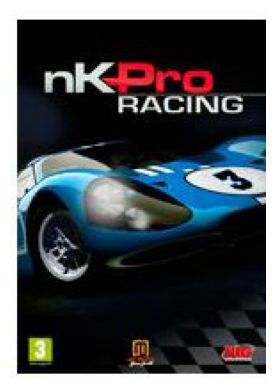

In [31]:
# Exemple d'utilisation
display_image(load_content_box_from_image(X_img_sample.iloc[0]["image_path"]), print_dim=True)

Remplissons notre Dataframe d'échantillon d'images avec ces informations.

In [32]:
df_content_box = X_img_sample["image_path"].apply(get_content_box).apply(pd.Series)
df_content_box.columns = ["content_dim", "x_min", "y_min", "x_max", "y_max"]

X_img_sample["content_dim"] = df_content_box["content_dim"]
X_img_sample[["content_width", "content_height"]] = X_img_sample["content_dim"].apply(pd.Series)
X_img_sample[["x_min", "y_min", "x_max", "y_max"]] = df_content_box[["x_min", "y_min", "x_max", "y_max"]]

In [33]:
data_info(X_img_sample)

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 36138 to 65534
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_path      1000 non-null   object
 1   image_shape     1000 non-null   object
 2   content_dim     1000 non-null   object
 3   content_width   1000 non-null   int64 
 4   content_height  1000 non-null   int64 
 5   x_min           1000 non-null   int64 
 6   y_min           1000 non-null   int64 
 7   x_max           1000 non-null   int64 
 8   y_max           1000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 78.1+ KB




image_path    image_shape  \
36138  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)   
68630  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)   
36172  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)   
9830   /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)   
28422  /Users/cramarokoto/Documents/Datascientest/jul...  (500, 500, 3)   

      content_dim  content_width  content_height  x_min  y_min  x_max  y_max  
36138  (144, 208)            144             208    176    144    319    351  
68630  (193, 208)            193             208    176    144    368    351  
36172  (500, 500)            500             500      0      0    499    499  
9830   (395, 500)            395             500     53      0    447    499  
28422  (368, 500)            368             500     64      0    431    499

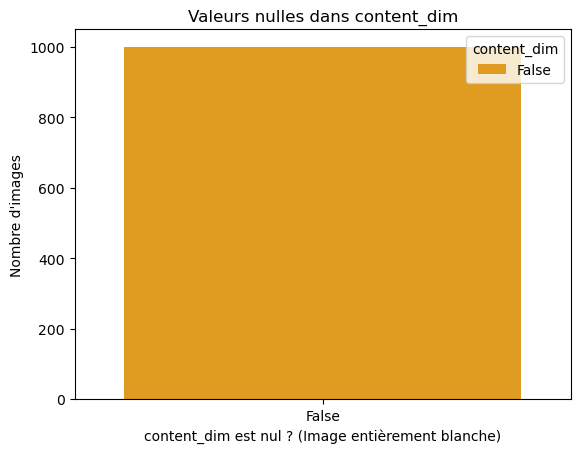

In [34]:
content_dim_value_counts = X_img_sample["content_dim"].isnull().value_counts()
sns.barplot(
    x=content_dim_value_counts.index,
    hue=content_dim_value_counts.index,
    y=content_dim_value_counts.values,
    palette={True: "blue", False: "orange"}
)
plt.title("Valeurs nulles dans content_dim")
plt.xlabel("content_dim est nul ? (Image entièrement blanche)")
plt.ylabel("Nombre d'images")
plt.show()

Quand une image est entièrement blanche, alors le content_dim est nul. Ce n'est pas le cas ici alors aucune de nos images (donc des images liées aux produits) n'est "nulle".

Il ne s'agit que d'un échantillon, même s'il a été choisi aléatoirement, cela ne nous donne pas la proportion totale, mais cela nous sert simplement d'idée. On supposera ainsi qu'aucune image n'est entièrement blanche.

### Uniformité des données d'image et préparation

On s'intéresse aux dimensions de la content box.

False    525
True     475
Name: count, dtype: int64


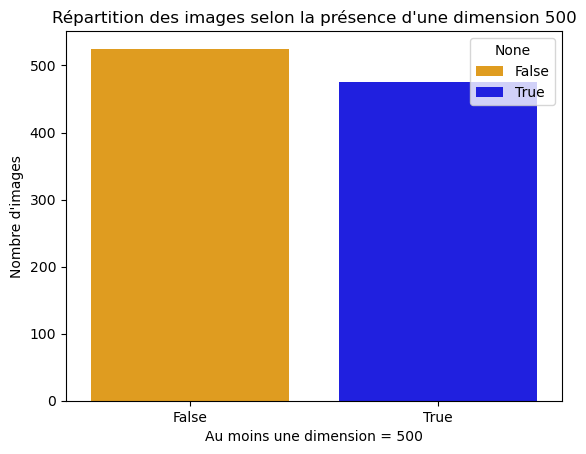

In [35]:
# On considère qu'une image est "complète" si au moins une de ses dimensions (largeur ou hauteur) est égale à 500 pixels.
# Création d'une colonne booléenne "image_complete" : True si width ou height = 500
image_complete = (X_img_sample['content_width'] == 500) | (X_img_sample['content_height'] == 500)
print(image_complete.value_counts())
# Countplot
sns.countplot(x=image_complete, hue=image_complete, palette={True: "blue", False: "orange"})

plt.xlabel("Au moins une dimension = 500")
plt.ylabel("Nombre d'images")
plt.title("Répartition des images selon la présence d'une dimension 500")
plt.show()

On constate que 52,5% n'a aucune de ses dimensions égale à 500. Beaucoup d'images n'occupent donc pas l'espace disponible, dans aucune des dimensions: nous pourrions donc les étendre.

En effet, la zone utile (qui serait également la zone utile pour l'apprentissage par un modèle) est bien différente selon les images.
Nous pourrions alors nous intéresser à appliquer des algorithmes de Computer Vision pour combler cette différence et harmoniser les données et les vecteurs qui en résulteraient.
L'exemple le plus simple serait d'utiliser un filtre avec des masques pour agrandir les images jusqu'à atteindre un des bords.

Il serait plus difficile pour un modèle s'entraînant sur des images d'être pertinent si certaines données sont des matrices creuses (pleine de blanc) et d'autres sont pleines.

Par exemple, deux piscines prenant toute l'image auraient plus d'informations communes dans leurs pixels qu'une piscine en grand, et une piscine en toute petite (majorité de pixels blancs).

Nous aurions pu également visualiser l'ensemble des différents format de Content box mais cela serait bien trop éparpillé et le traitement final serait identique. 

Pour autant, cela est réalisable avec un **heatmap** de **luminance** (intensité des nuances de gris) qui pourra nous donner une idée de la répartition des pixels, et donc des dimensions.

Une étude intéressante peut également être la "forme" des images, c'est-à-dire grossièrement le rapport longueur/largeur des images.

### Répartition des dimensions

Comme évoqué précédemment, nous pouvons avoir un aperçu de la répartition des dimensions à travers deux indices:
- une heatmap de la luminance,
- la distribution du rapport longueur/largeur.


#### Luminance

Pour effectuer une heatmap de la luminance et ainsi avoir une idée de la répartition des dimensions des images, il nous faut d'abord transformer nos images en nuances de gris. Nous passons alors de 3 canaux par pixel à un seul canal.

Exemple:

Image dimensions: 500x500 pixels


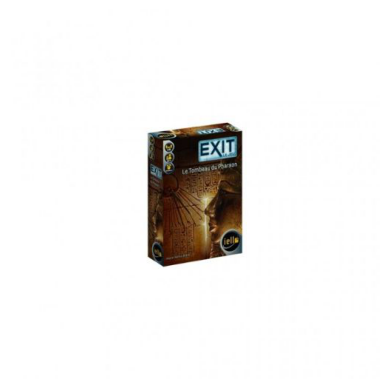

In [36]:
display_image(X_img_sample.iloc[1]["image_path"], print_dim=True)

In [37]:
def to_grayscale(img_path):
    img = Image.open(img_path).convert("L")
    # Passage en float32 pour diviser par 2 la mémoire sans perte notable de précision
    img_gray = np.asarray(img, dtype=np.float32) / 255.0  # Normalisation entre 0 et 1
    return img_gray

Image dimensions: 500x500 pixels


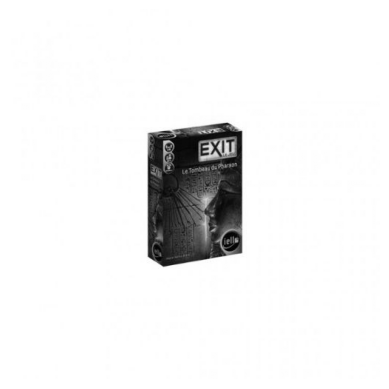

In [38]:
display_image(to_grayscale(X_img_sample.iloc[1]["image_path"]), print_dim=True, cmap="gray")

Réunissons maintenant toutes les images et leurs nuances de gris pour former la heatmap.

In [39]:
# On stock chaque image en niveaux de gris (chacune étant un tableau (W, H)) dans une liste
gray_images = []
for path in X_img_sample["image_path"]:
    img = to_grayscale(path)
    gray_images.append(img)

# On stack les images en un tableau 3D (N, W, H) où N est le nombre d'images
gray_images_array = np.stack(gray_images, axis=0)

# On calcule la moyenne pixel par pixel sur l'axe des images (N)
heatmap_mean = gray_images_array.mean(axis=0)

Affichons maintenant la heatmap !

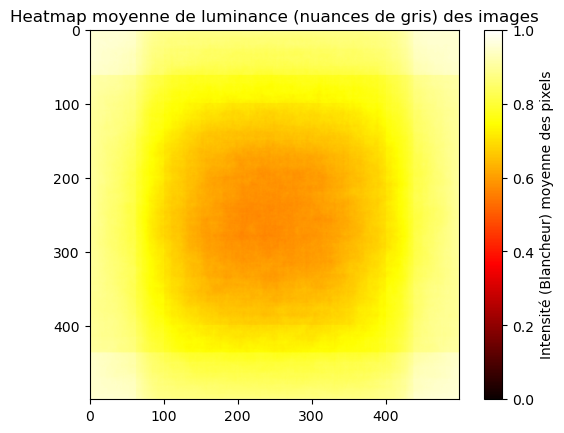

In [40]:
plt.imshow(heatmap_mean, cmap='hot', vmin=0, vmax=1) # Les valeurs vont de 0 (noir) à 1 (blanc)
plt.colorbar(label="Intensité (Blancheur) moyenne des pixels")
plt.title("Heatmap moyenne de luminance (nuances de gris) des images")
plt.show()

Nous voyons déjà bien la répartition des pixels "blancs" rassemblés sur les extérieurs tandis que plus de contenu (ombres/contrastes/couleurs moins blanches) se réunissent plus au centre de l'image.
Les coins prennent bien plus de valeurs blanches.

Nous pouvons également constater que le contraste est assez léger et les moyennes semblent osciller seulement sur la moitié des valeurs possibles. Avant d'analyser un peu plus la heatmap, nous allons donc nous centrer sur les valeurs prises pour observer au mieux les contrastes observables.

Pour cela, prenons quelques données sur les intensités moyennes et centrons la heatmap autour de ces valeurs.

In [41]:
heatmap_mean.mean(), heatmap_mean.min(), heatmap_mean.max()

(np.float32(0.76731634), np.float32(0.56006646), np.float32(0.9607998))

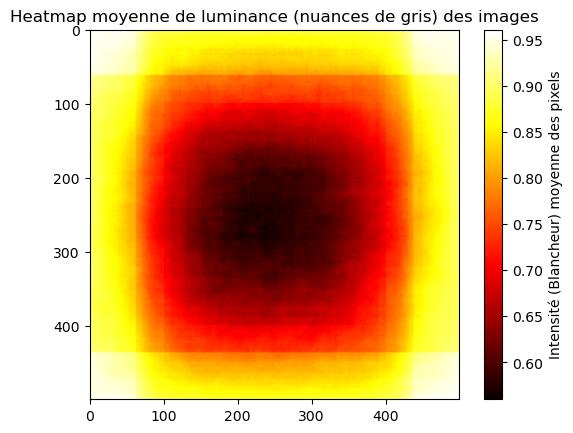

In [42]:
plt.imshow(heatmap_mean, cmap='hot') # Les valeurs vont de 0.56 (noir), 0.96 (blanc)
plt.colorbar(label="Intensité (Blancheur) moyenne des pixels")
plt.title("Heatmap moyenne de luminance (nuances de gris) des images")
plt.show()

En effet, nous observons plus distinctement des propriétés:
- une tâche noire est clairement identifiable au mileu (intensité moyenne plus sombre),
- un vrai carré orange se forme entre (75, 75), (425,75), (425, 425) et (75, 425),
- les côtés jaunes indiquent une grande éclaircie moyenne, des bords non-exploités,
- les coins sont quasiment blancs.

On en conclut que :
- un bon nombre d'images ne sont pas à la bonne dimension mais sont centrées,
- un nombre non-négligeable d'images prennent la totalité de l'espace possible mais sont plus larges que longues (bords jaunes gauche et droite), ou plus longues que larges (bords jaunes haut et bas) car ils laissent notamment les coins blancs.

On s'intéresse donc maintenant à cette différence largeur/hauteur. Pour cela, nous allons étudier la distribution du ratio largeur/hauteur.

#### Distribution du ratio largeur/hauteur

Pour étudier ce ratio, nous avons besoin de la vraie longueur et de la vraie largeur des images, c'est-à-dire sans les bords ou toute mesure vide.

Nous considérons alors le plus petit rectangle dans laquelle nous pouvons placer notre image, c'est-à-dire dans lequel il y a tous les pixels plein (non-blancs) et avec le moins de pixels blancs possible. Cela tombe bien, c'est ce qui s'appelle la Content Box, que nous avons déjà mis en place précédemment !

In [43]:
# Rappel:
print(list(X_img_sample.columns))

# On stoque déjà la largeur et la hauteur du contenu utile dans X_img_sample
# en tant que content_width et content_height

# Calcul du ratio largeur/hauteur qu'on rajoute au sample
X_img_sample["content_ratio"] = np.round(X_img_sample["content_width"] / X_img_sample["content_height"], 4)

['image_path', 'image_shape', 'content_dim', 'content_width', 'content_height', 'x_min', 'y_min', 'x_max', 'y_max']


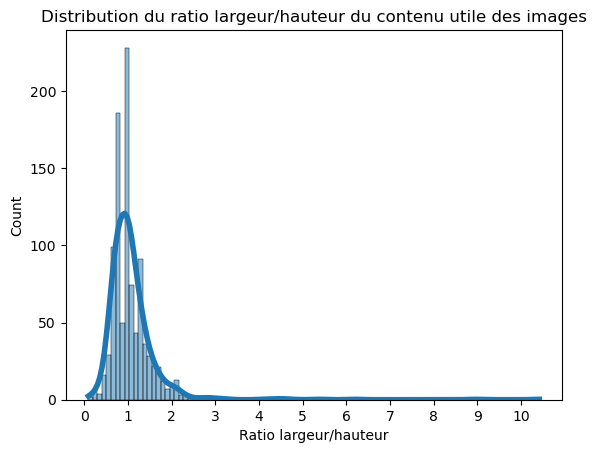

In [44]:
sns.histplot(data=X_img_sample, x="content_ratio", bins=100, kde=True, line_kws={"color" : "red", "linewidth": 4})
plt.title("Distribution du ratio largeur/hauteur du contenu utile des images")
plt.xlabel("Ratio largeur/hauteur")
plt.xticks(np.linspace(0, 10, 11))
plt.show()

Nous observons une distribution plutôt symétrique entre 0 et 2 qui semble centrée en 1. Cependant, un certain nombre de valeurs extrêmes montent jusqu'à 11 ce qui enlève la symétrie. Elles se font toutefois de plus en plus rare à hauteur qu'elles s'éloignent de 1.

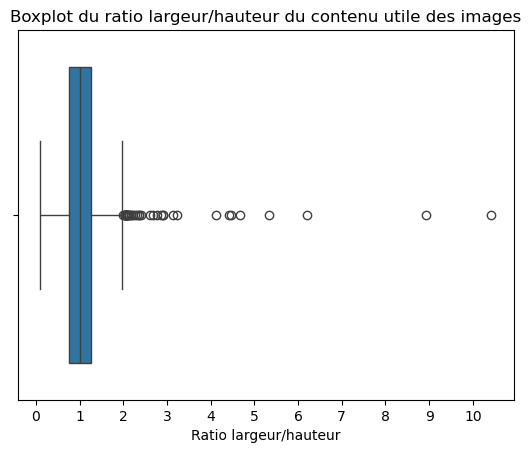

In [45]:
sns.boxplot(data=X_img_sample, x="content_ratio")
plt.title("Boxplot du ratio largeur/hauteur du contenu utile des images")
plt.xlabel("Ratio largeur/hauteur")
plt.xticks(np.linspace(0, 10, 11))
plt.show()

On observe cette fois-ci que la médiane est d'environ un, que les quartiles semblent être symétrique à 1, aux alentours de 0.7 et 1.3, et enfin on remarque que les whiskers (moustaches) forment également presqe une symétrie autour de 1; à 0 et à 2 environ.

Voici de manière chiffrée la moyenne, la variance et l'écart-type de ce ratio.

In [46]:
X_img_sample["content_ratio"].mean(), np.sqrt(X_img_sample["content_ratio"].std()), X_img_sample["content_ratio"].std()


(np.float64(1.0806678), np.float64(0.7924529597118457), 0.6279816933560642)

Nous aurions pu penser à une distribution de type loi normale, mais les longues valeurs extrêmes sur la droite nous en éloignent un peu. Un loi lognormale de petit écart-type est envisageable.

Outre nommer spécifiquement une loi proche de notre distribution, rappelons-nous que les valeurs du ratio largeur/hauteur tendant vers + infini représentent le fait de tendre vers 0 pour le ratio hauteur/largeur, et inversement.

On peut ainsi conclure qu'en moyenne, les images sont aussi longues que larges et qu'il n'y a pas une différence significative entre le nombre d'images essentiellement sur la largeur et le nombre d'images essentiellement sur la hauteur, d'après les boxplots.

#### Conclusion des dimensions

Les images sont centrées, les rebords sont globalement bien plus blancs car les images ne prennent pas la totalité de l'espaces, et les coins sont les moins représentés car ils sont laissés de côté à la fois par les images plus petites, mais aussi par les images dont les dimensions sont asymétriques.

Les images de dimensions asymétriques sont plutôt équitablement réparties entre les images plus longues que larges et les images plus larges que longues.

# Récapitulatif de l'analyse exploratoire des données initiales

|        | Nombre lignes dans la table : ? | 84916                                                                                                             | Pour le dataset utilisable                                                                                                                       |                                                                                                                      |            |                                                                                                                                                                                                                                           |                                                                                                                                                                                                      |                                                                                  |
|--------|---------------------------------|-------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| N° Col | Nom de la colonne               | Description                                                                                                       | Disponibilité de la variable a priori                                                                                                            | Type informatique                                                                                                    | Taux de NA | Gestion des NA                                                                                                                                                                                                                            | Distribution des valeurs                                                                                                                                                                             | Remarques sur la colonne                                                         |
|        |                                 | Que représente cette variable en quelques mots ?                                                                  | Pouvez vous connaitre ce champ en amont d'une prédiction ? Aurez vous accès à cette variable en environnement de production ?                    | int64, float etc...  Si "object", détaillez.                                                                         | en %       | Quelle mode de (non) - gestion des NA favorisez vous ?                                                                                                                                                                                    | Pour les variables catégorielles comportant moins de 10 catégories, énumérez toutes les catégories.  Pour les variables quantitatives, détaillez la distribution (statistiques descriptives de base) | champs libre à renseigner                                                        |
| 1      | Désignation                     | L’appelation du produit : comme une petite description qui donne l’essentiel sur le produit et donc sa catégorie. | Cette donnée est la base textuelle et est toujours accessible pour la prédiction même en environnement de production.                            | «object » qui est clairement une chaîne de caractères. Certains symboles doivent être changés pour la compréhension. | 0,00 %     | /                                                                                                                                                                                                                                         | C’est un string qui n’est ni quantitatif ni catégoriel. C’est une variable descriptive.                                                                                                              | Les valeurs d’un tel string sont très vastes et une analyse NLP sera nécessaire. |
| 2      | Description                     | Description plus détaillé du produit, de son état, de son utilisation. Regorge d’informations et de mots clés.    | Cette donnée est accessible pour la prédiction même en environnement de production, seulement quand elle n’est pas n/a (nombreuses occurrences). | «object » qui est clairement une chaîne de caractères. Certains symboles doivent être changés pour la compréhension. | 35.09%     | Il s’agit d’une description textuelle : on ne peut la générer pertinemment ni effectuer un remplissage statistique. Soit on l’utilise seulement lorsqu’elle est présente ; soit on fait un remplissage par IA à partir de la désignation. | Identique à la désignation à l’exception des nombreux N/A.                                                                                                                                           | Identique à la désignation.                                                      |
| 3      | productid                       | L’index du produit                                                                                                | N’aura pas de valeur pour être entraîné autre que pour relier le produit (textuel) à son image                                                   | int64                                                                                                                | 0,00 %     | /                                                                                                                                                                                                                                         | /                                                                                                                                                                                                    | /                                                                                |
| 4      | imageid                         | L’index de l’image                                                                                                | N’aura pas de valeur pour être entraîné autre que pour relier le produit (textuel) à son image                                                   | int64                                                                                                                | 0,00 %     | /                                                                                                                                                                                                                                         | /                                                                                                                                                                                                    | /                                                                                |
| 5      | imagepath                       | Le path de l’image pour l’associer au produit                                                                     | Utile en prod pour entraîner sur l’image tout en ayant la bonne évaluation de la classe                                                          | string                                                                                                               | 0.00%      | /                                                                                                                                                                                                                                         | /                                                                                                                                                                                                    | /                                                                                |

# Stratégie envisagée suite à l'exploration des données

Première idée de stratégie:

- Diviser X_train en deux DataFrames : un pour l'entraînement, l'autre pour le test.
- Faire de même pour y_train avec la même répartition.
- Définir si nous décidons de remplir les descriptions nulles par des descriptions générées (identique à la désignation ? mot clé de la désignation ?) ou non.
- Créer un modèle pour classer les produits à partir du texte, incluant du traitement du langage naturel (NLP) sur la désignation et la description de chaque produit.
- Appliquer des algorithmes de Computer Vision pour harmoniser le dataset d'images.
- Transformer les images en vecteurs, associés aux produits, pour créer un DataFrame de pixels.
- Créer un modèle pour classer les produits à partir des images.
- Évaluer les deux modèles.
- Les ajuster ou les améliorer.
- Définir des pondérations pour les deux modèles en fonction de leurs performances.
- Créer une fonction pour obtenir une moyenne pondérée des probabilités pour les meilleures classes. (Comme pour du Bagging)
- Évaluer les résultats en sélectionnant la meilleure classe selon cette moyenne pondérée lors d'une phase de test.
- Tenter d'améliorer les résultats en travaillant sur les pondérations.
- Comparer les performances de ces résultats avec celles du meilleur des deux modèles initiaux.
- Conclure sur la solution (le modèle ou la combinaison) qui serait la plus efficace.